In [14]:
import pandas as pd

data = pd.read_csv('../../datasets/breast_cancer.csv')
target = data['diagnosis']
data = data.drop(columns=['id', 'diagnosis'])
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
from sklearn.preprocessing import StandardScaler

data_scaled = StandardScaler().fit_transform(data)
data_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [16]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(data_scaled)
principalComponents_breast

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [17]:
print(f'Explained variation per principal component: {pca_breast.explained_variance_ratio_}')

Explained variation per principal component: [0.44272026 0.18971182]


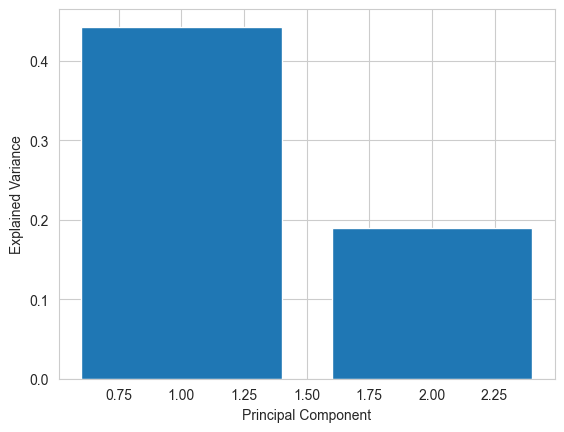

In [18]:
# plot the explained variance
import matplotlib.pyplot as plt

plt.bar(range(1, len(pca_breast.explained_variance_ratio_)+1), pca_breast.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

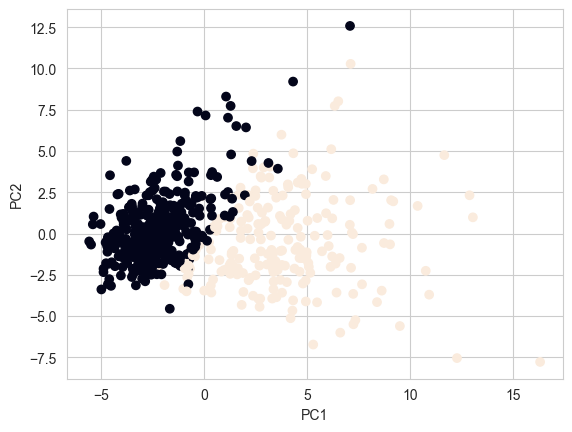

In [19]:
target = target.map({'M': 1, 'B': 0})
plt.scatter(principalComponents_breast[:,0], principalComponents_breast[:,1], c=target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

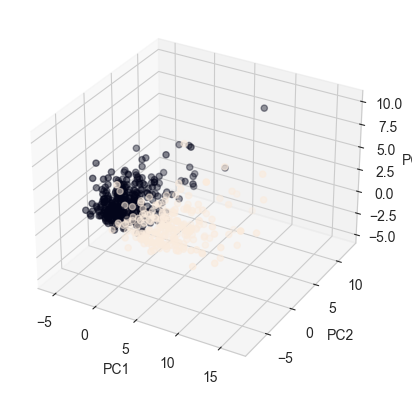

In [20]:
# 3D plot
pca_breast = PCA(n_components=3)
principalComponents_breast = pca_breast.fit_transform(data_scaled)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalComponents_breast[:,0], principalComponents_breast[:,1], principalComponents_breast[:,2], c=target)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [21]:
# explained variance
print(f'Explained variation per principal component: {pca_breast.explained_variance_ratio_}')

Explained variation per principal component: [0.44272026 0.18971182 0.09393163]


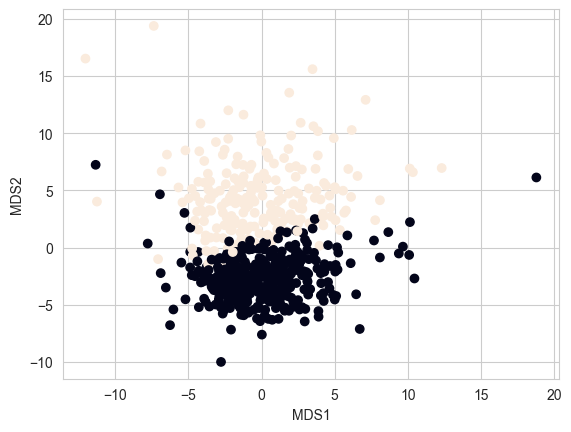

In [22]:
# mds
from sklearn.manifold import MDS

mds = MDS(n_components=2)
mds_breast = mds.fit_transform(data_scaled)
plt.scatter(mds_breast[:,0], mds_breast[:,1], c=target)
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.show()

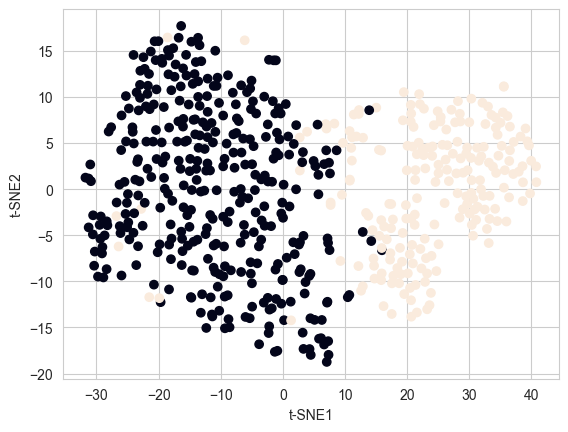

In [23]:
# t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_breast = tsne.fit_transform(data_scaled)
plt.scatter(tsne_breast[:,0], tsne_breast[:,1], c=target)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

/home/joao-correia/anaconda3/envs/ML_ADS/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


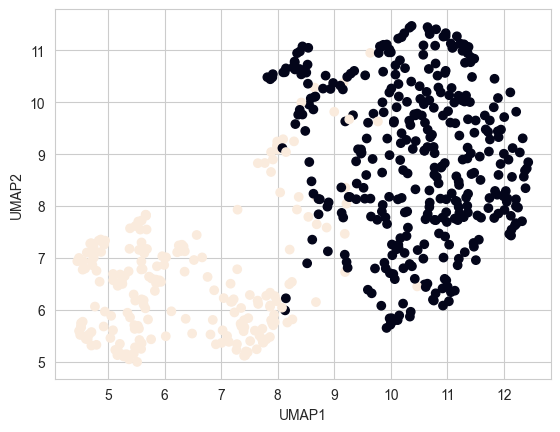

In [24]:
# UMAP
import umap

umap_breast = umap.UMAP(n_components=2).fit_transform(data_scaled)
plt.scatter(umap_breast[:,0], umap_breast[:,1], c=target)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()